# What is Pneumonia?
**Pneumonia is an inflammatory condition of the lung affecting primarily the small air sacs known as alveoli.Symptoms typically include some combination of productive or dry cough, chest pain, fever and difficulty breathing. The severity of the condition is variable. Pneumonia is usually caused by infection with viruses or bacteria and less commonly by other microorganisms, certain medications or conditions such as autoimmune diseases.Risk factors include cystic fibrosis, chronic obstructive pulmonary disease (COPD), asthma, diabetes, heart failure, a history of smoking, a poor ability to cough such as following a stroke and a weak immune system. Diagnosis is often based on symptoms and physical examination. Chest X-ray, blood tests, and culture of the sputum may help confirm the diagnosis.The disease may be classified by where it was acquired, such as community- or hospital-acquired or healthcare-associated pneumonia.**


In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('chest_xray'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

chest_xray\chest_xray\.DS_Store
chest_xray\chest_xray\test\.DS_Store
chest_xray\chest_xray\test\NORMAL\IM-0001-0001.jpeg
chest_xray\chest_xray\test\NORMAL\IM-0003-0001.jpeg
chest_xray\chest_xray\test\NORMAL\IM-0005-0001.jpeg
chest_xray\chest_xray\test\NORMAL\IM-0006-0001.jpeg
chest_xray\chest_xray\test\NORMAL\IM-0007-0001.jpeg
chest_xray\chest_xray\test\NORMAL\IM-0009-0001.jpeg
chest_xray\chest_xray\test\NORMAL\IM-0010-0001.jpeg
chest_xray\chest_xray\test\NORMAL\IM-0011-0001-0001.jpeg
chest_xray\chest_xray\test\NORMAL\IM-0011-0001-0002.jpeg
chest_xray\chest_xray\test\NORMAL\IM-0011-0001.jpeg
chest_xray\chest_xray\test\NORMAL\IM-0013-0001.jpeg
chest_xray\chest_xray\test\NORMAL\IM-0015-0001.jpeg
chest_xray\chest_xray\test\NORMAL\IM-0016-0001.jpeg
chest_xray\chest_xray\test\NORMAL\IM-0017-0001.jpeg
chest_xray\chest_xray\test\NORMAL\IM-0019-0001.jpeg
chest_xray\chest_xray\test\NORMAL\IM-0021-0001.jpeg
chest_xray\chest_xray\test\NORMAL\IM-0022-0001.jpeg
chest_xray\chest_xray\test\NORMAL\IM-

# Importing the necessary libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import cv2, os, random
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode, plot, iplot
import glob
import tensorflow
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from mlxtend.plotting import plot_confusion_matrix
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from warnings import filterwarnings
filterwarnings("ignore")

In [27]:
from sklearn import set_config
set_config(print_changed_only = False)
directory = "chest_xray/"

In [28]:
train_df = glob.glob("chest_xray/train/**/*.jpeg")
test_df = glob.glob("chest_xray/test/**/*.jpeg")
validation_df = glob.glob("chest_xray/val/**/*.jpeg")

In [29]:
train_df[:5], test_df[:5]

(['chest_xray/train\\NORMAL\\IM-0115-0001.jpeg',
  'chest_xray/train\\NORMAL\\IM-0117-0001.jpeg',
  'chest_xray/train\\NORMAL\\IM-0119-0001.jpeg',
  'chest_xray/train\\NORMAL\\IM-0122-0001.jpeg',
  'chest_xray/train\\NORMAL\\IM-0125-0001.jpeg'],
 ['chest_xray/test\\NORMAL\\IM-0001-0001.jpeg',
  'chest_xray/test\\NORMAL\\IM-0003-0001.jpeg',
  'chest_xray/test\\NORMAL\\IM-0005-0001.jpeg',
  'chest_xray/test\\NORMAL\\IM-0006-0001.jpeg',
  'chest_xray/test\\NORMAL\\IM-0007-0001.jpeg'])

In [30]:
print("There is {} images in the training dataset".format(len(train_df)))
print("There is {} images in the test dataset".format(len(test_df)))
print("There is {} images in the validation dataset".format(len(validation_df)))

There is 5216 images in the training dataset
There is 624 images in the test dataset
There is 16 images in the validation dataset


In [31]:
datasets, pneumonia_lung, normal_lung = ["train", "test", "val"], [], []

for i in datasets:
    path = os.path.join(directory, i)
    normal = glob.glob(os.path.join(path, "NORMAL/*.jpeg"))
    pneumonia = glob.glob(os.path.join(path, "PNEUMONIA/*.jpeg"))
    normal_lung.extend(normal), pneumonia_lung.extend(pneumonia)

print("The number of pneumonia images is {}".format(len(pneumonia_lung)))
print("The number of non-pneumonia images is {}".format(len(normal_lung)))

The number of pneumonia images is 4273
The number of non-pneumonia images is 1583


In [32]:
# Mélanger les listes
random.shuffle(normal_lung)
random.shuffle(pneumonia_lung)

# Séparer les images par catégorie
normal_images = normal_lung[:50]
pneumonia_images = pneumonia_lung[:50]

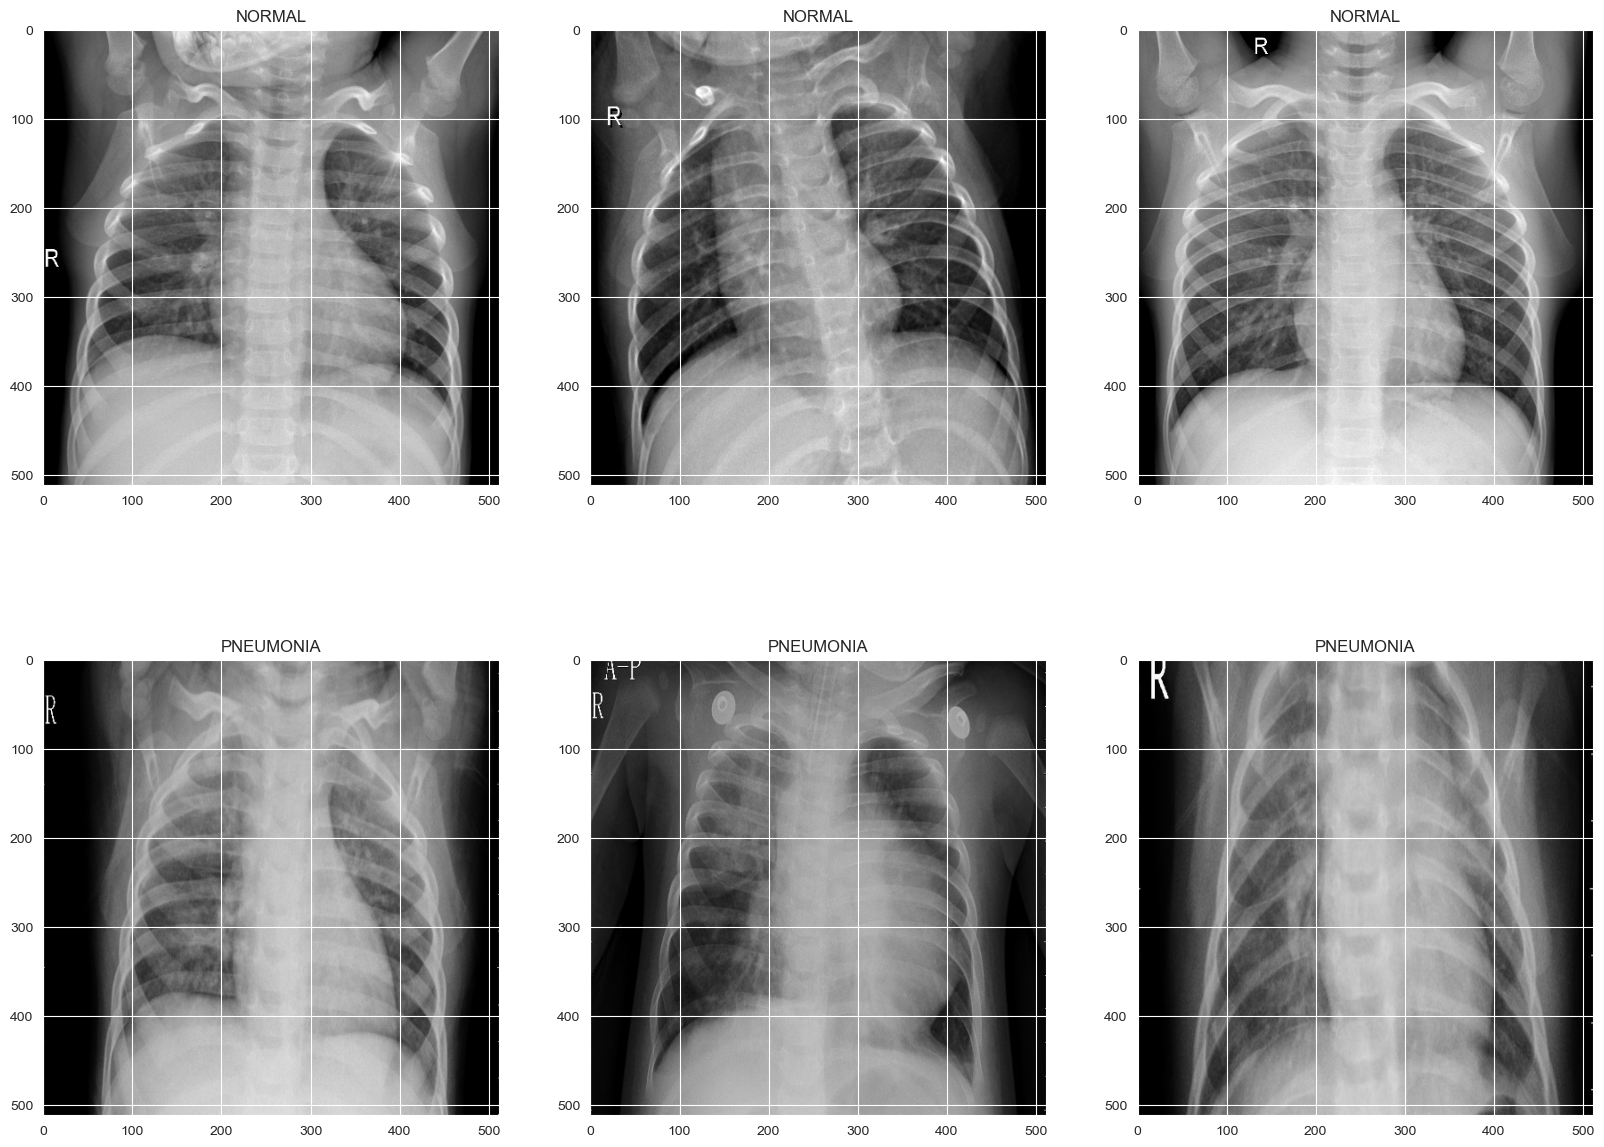

In [33]:
# Créer une figure avec des sous-plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))

# Afficher les images normales
for i in range(3):
    img = cv2.imread(normal_images[i])
    img = cv2.resize(img, (512, 512))
    axes[0, i].imshow(img)
    axes[0, i].set_title('NORMAL')

# Afficher les images de la pneumonie
for i in range(3):
    img = cv2.imread(pneumonia_images[i])
    img = cv2.resize(img, (512, 512))
    axes[1, i].imshow(img)
    axes[1, i].set_title('PNEUMONIA')

plt.show()

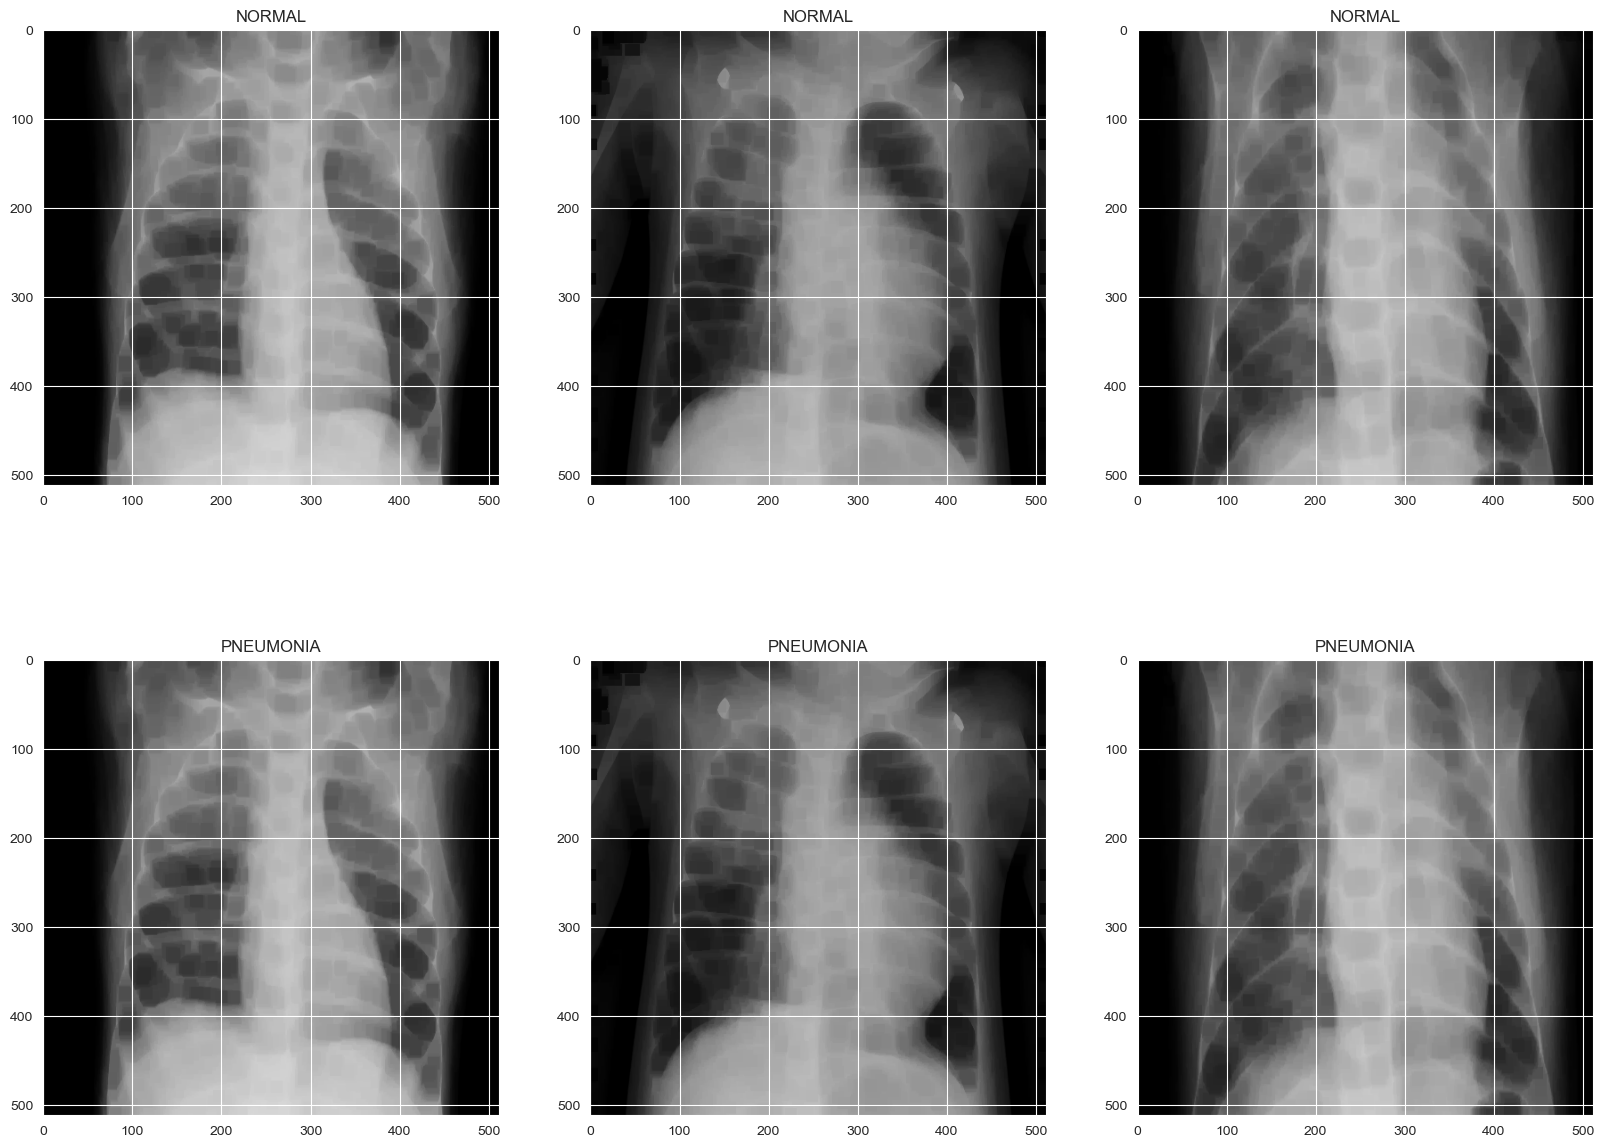

In [34]:
# Créer une figure avec des sous-plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))

# Afficher les images normales
for i in range(3):
    img = cv2.imread(normal_images[i])
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    kernel = np.ones((5, 5), np.uint8)
    image_erosion = cv2.erode(img, kernel, iterations=3)
    axes[0, i].imshow(image_erosion)
    axes[0, i].set_title('NORMAL')

# Afficher les images de la pneumonie
for i in range(3):
    img = cv2.imread(pneumonia_images[i])
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    kernel = np.ones((5, 5), np.uint8)
    image_erosion = cv2.erode(img, kernel, iterations=3)
    axes[0, i].imshow(image_erosion)
    axes[1, i].imshow(image_erosion)
    axes[1, i].set_title('PNEUMONIA')

plt.show()

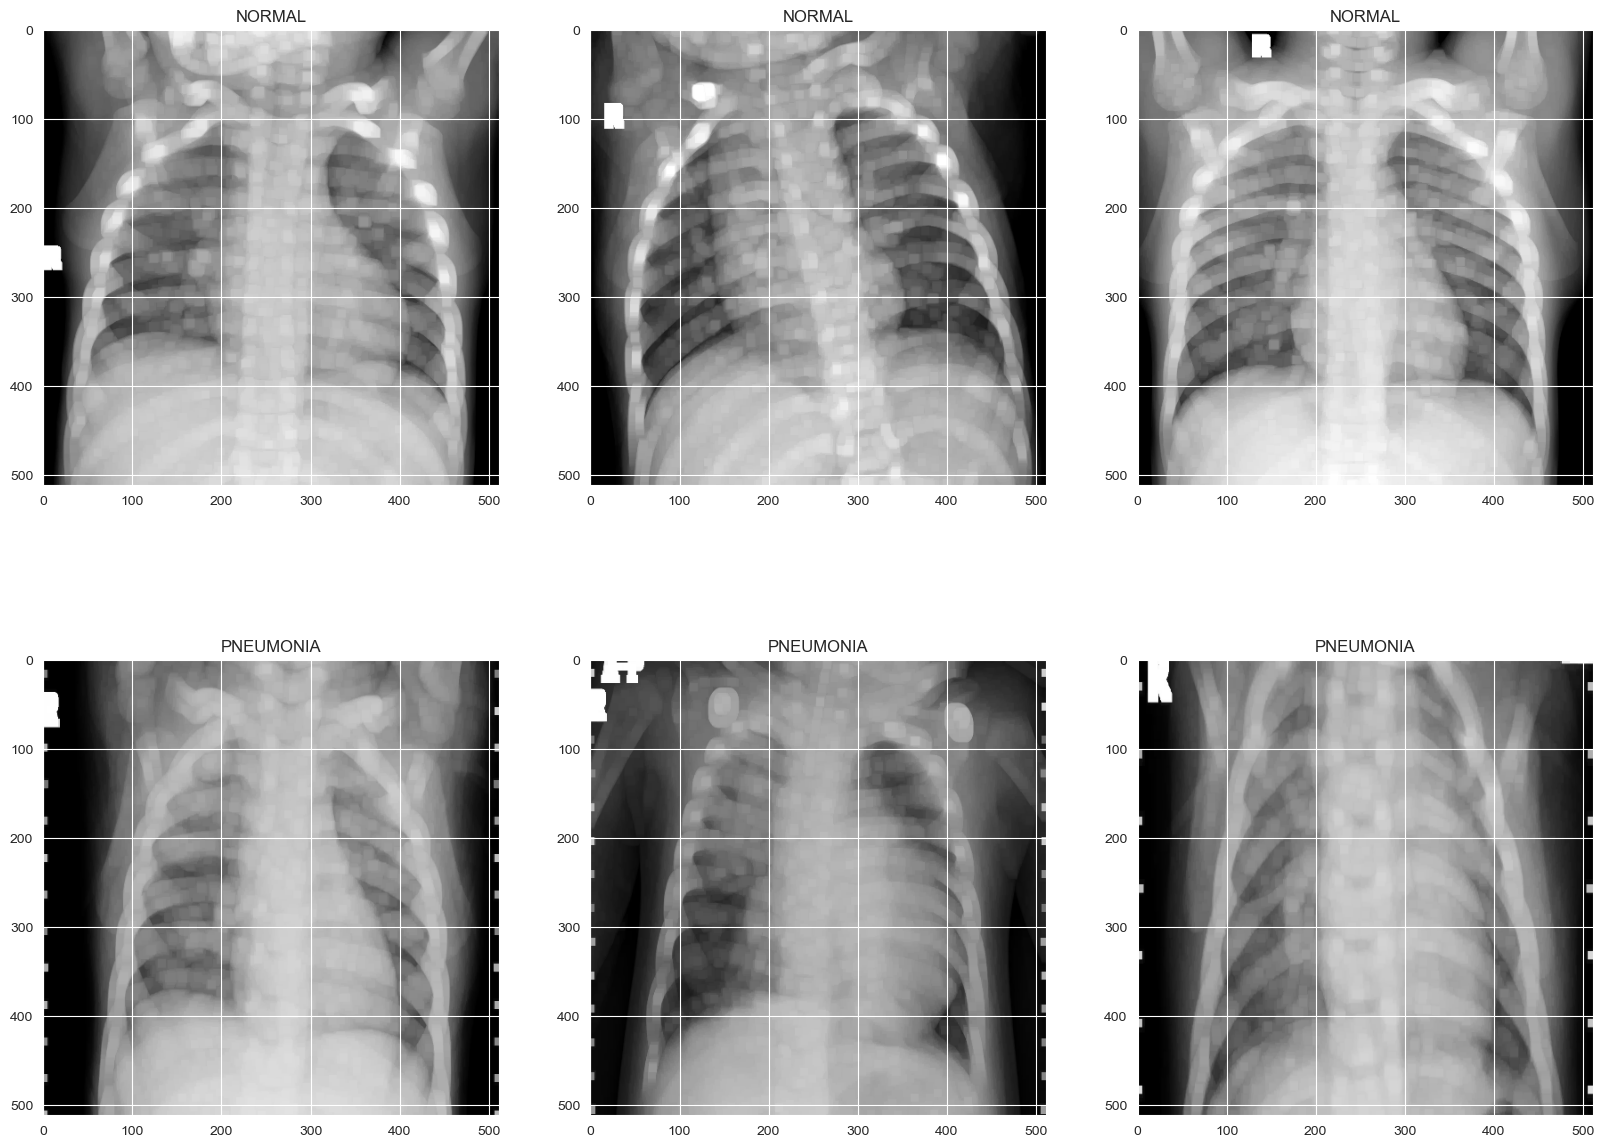

In [35]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))

# Afficher les images normales
for i in range(3):
    img = cv2.imread(normal_images[i])
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    kernel = np.ones((5, 5), np.uint8)
    image_dilation = cv2.dilate(img, kernel, iterations = 2)
    axes[0, i].imshow( image_dilation)
    axes[0, i].set_title('NORMAL')

# Afficher les images de la pneumonie
for i in range(3):
    img = cv2.imread(pneumonia_images[i])
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    kernel = np.ones((5, 5), np.uint8)
    image_dilation = cv2.dilate(img, kernel, iterations = 2)
    axes[1, i].imshow(image_dilation)
    axes[1, i].set_title('PNEUMONIA')

plt.show()

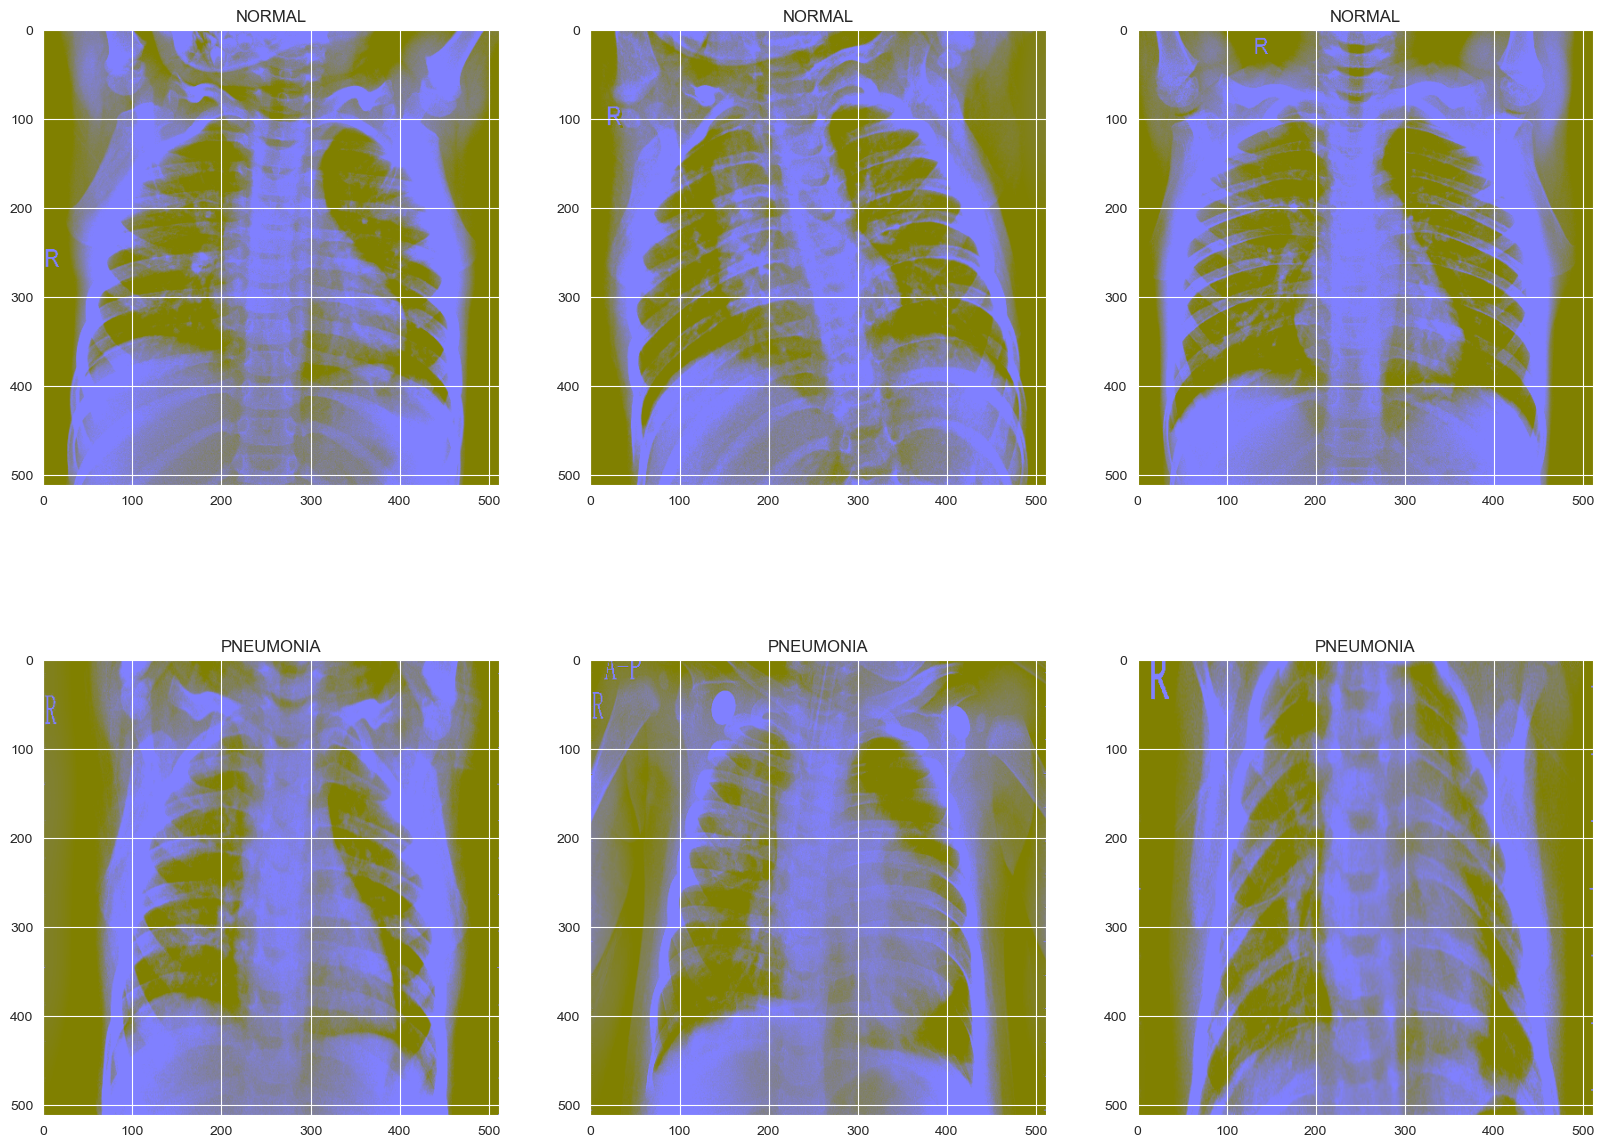

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))

# Afficher les images normales
for i in range(3):
    img = cv2.imread(normal_images[i])
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    img = cv2.addWeighted (img, 4, cv2.GaussianBlur(img, (0, 0), 512/10), -4, 128)
    axes[0, i].imshow( img)
    axes[0, i].set_title('NORMAL')

# Afficher les images de la pneumonie
for i in range(3):
    img = cv2.imread(pneumonia_images[i])
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    img = cv2.addWeighted (img, 4, cv2.GaussianBlur(img, (0, 0), 512/10), -4, 128)
    axes[1, i].imshow(img)
    axes[1, i].set_title('PNEUMONIA')

plt.show()

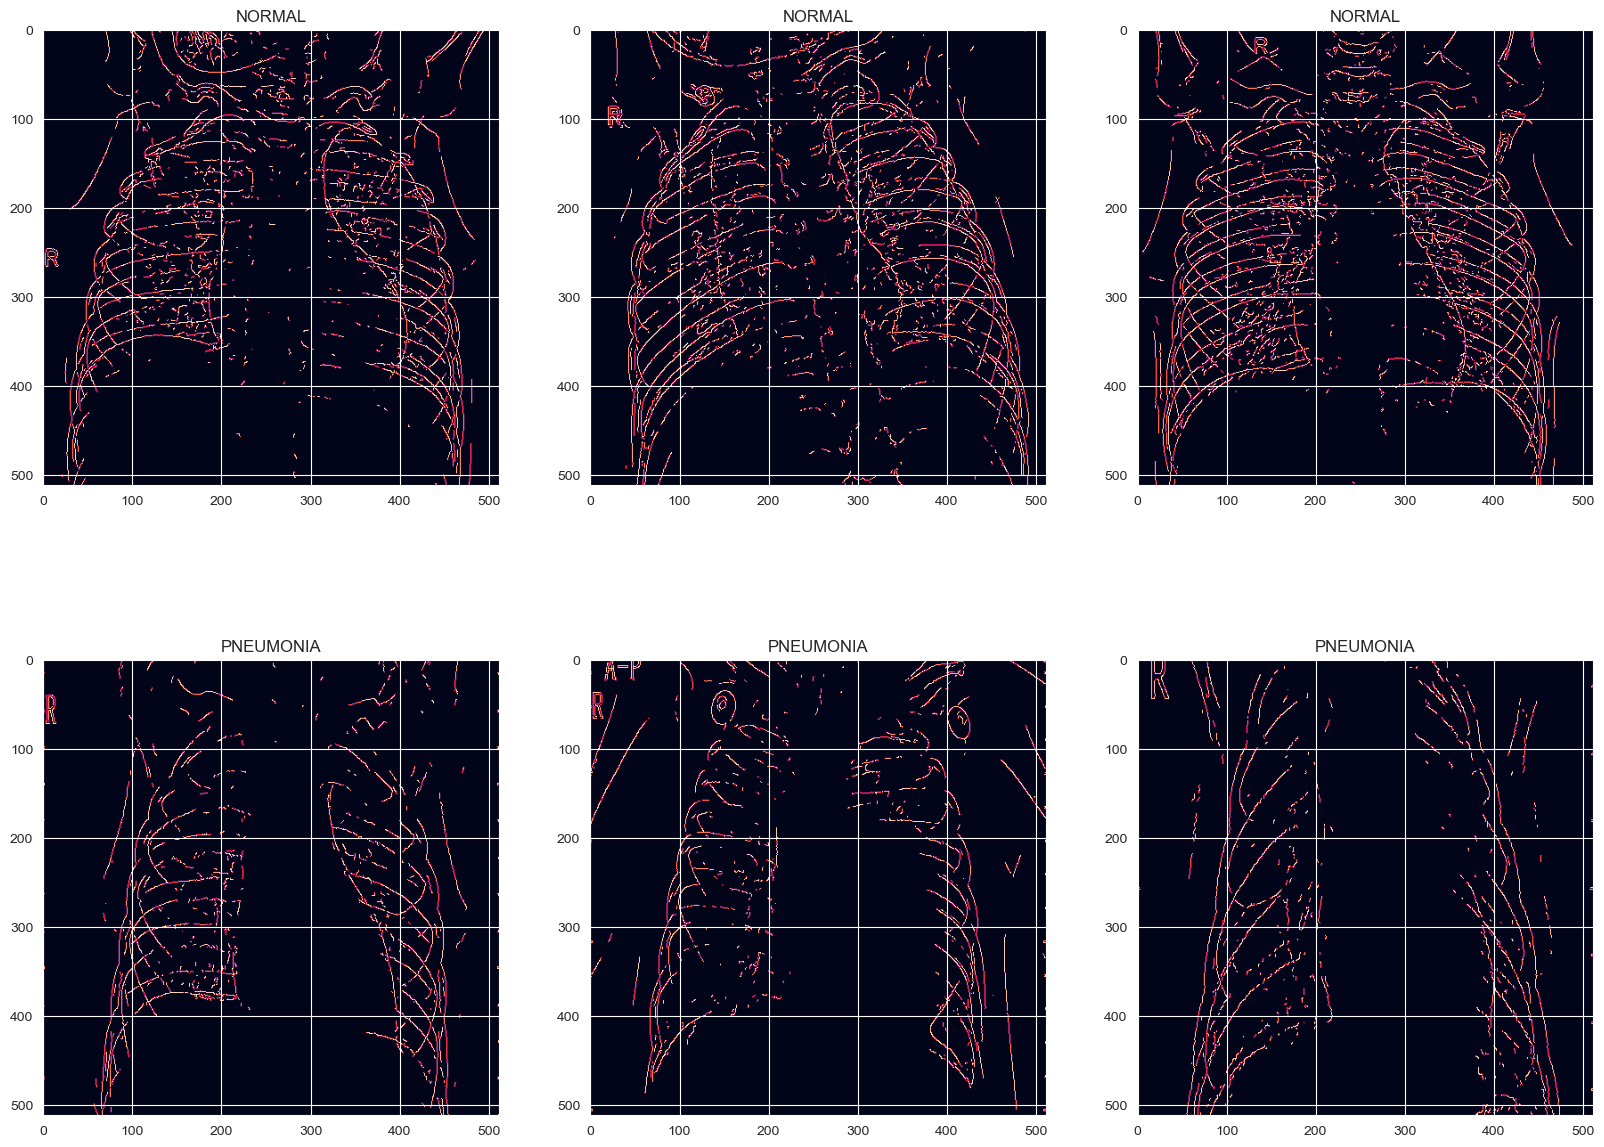

In [37]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))

# Afficher les images normales
for i in range(3):
    img = cv2.imread(normal_images[i])
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    detected_edges = cv2.Canny(img, 80, 100)
    axes[0, i].imshow(detected_edges)
    axes[0, i].set_title('NORMAL')

# Afficher les images de la pneumonie
for i in range(3):
    img = cv2.imread(pneumonia_images[i])
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    detected_edges = cv2.Canny(img, 80, 100)
    axes[1, i].imshow(detected_edges)
    axes[1, i].set_title('PNEUMONIA')

plt.show()

In [38]:
train_dir = "chest_xray/train"
test_dir = "chest_xray/test"
validation_dir = "chest_xray/val"

In [39]:
# Créer un générateur d'images avec des augmentations
train_datagen = ImageDataGenerator(
            rescale = 1/255.,
            horizontal_flip = True,
            vertical_flip = True,
            rotation_range = 0.3,
            featurewise_center=True,
            zca_whitening = True,
            width_shift_range = 0.25,
            height_shift_range = 0.25,
            channel_shift_range = 0.35,
            shear_range = 0.2,
            zoom_range = 0.4)

val_test_datagen = ImageDataGenerator(rescale = 1./255)


# Utiliser le générateur pour lire et augmenter les images d'un répertoire
train_set = train_datagen.flow_from_directory(train_dir, class_mode = "binary", batch_size = 16, target_size = (224, 224))
validation_set = val_test_datagen.flow_from_directory(validation_dir, class_mode = "binary", batch_size = 16, target_size = (224, 224))
test_set = val_test_datagen.flow_from_directory(test_dir, class_mode = "binary", batch_size = 16, target_size = (224, 224))

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [40]:
# Afficher quelques images générées à partir de l'ensemble d'entraînement
generated_images, labels = train_set.next()

# Mettez en place une grille pour afficher les images
fig, axes = plt.subplots(4, 4, figsize=(20, 15))
axes = axes.ravel()

for i in range(16):
    # Vérifier si l'indice dépasse la taille de la grille
    if i < len(axes):
        axes[i].imshow(generated_images[i])
        axes[i].axis('off')
        #axes[i].set_title('Label: {}'.format(labels[i]))

plt.show()

In [41]:
model = Sequential()

#convolutional neural networks - CNNs
model.add(Conv2D(32, (3,3), strides = (1, 1),activation = "relu", padding = "same", input_shape = (224, 224, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, (3,3), strides = (1, 1), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3,3), strides = (1, 1), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(256, (3,3), strides = (1, 1), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())

#fully connected layer
model.add(Dense(128, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(32, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 56, 56, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       7

In [42]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [43]:
#early_stopping_callbacks = tensorflow.keras.callbacks.EarlyStopping(patience = 15,restore_best_weights = True,verbose = 1)
history = model.fit(train_set, epochs = 10 ,batch_size=32 ,validation_data = test_set)

Epoch 1/10
326/326 [==============================] - 211s 645ms/step - loss: 0.4471 - accuracy: 0.7816 - val_loss: 0.6202 - val_accuracy: 0.7484
Epoch 2/10
326/326 [==============================] - 202s 619ms/step - loss: 0.3293 - accuracy: 0.8522 - val_loss: 0.4298 - val_accuracy: 0.7885
Epoch 3/10
326/326 [==============================] - 238s 729ms/step - loss: 0.3164 - accuracy: 0.8572 - val_loss: 0.8336 - val_accuracy: 0.6330
Epoch 4/10
326/326 [==============================] - 281s 863ms/step - loss: 0.3013 - accuracy: 0.8683 - val_loss: 0.5344 - val_accuracy: 0.7564
Epoch 5/10
326/326 [==============================] - 281s 860ms/step - loss: 0.2745 - accuracy: 0.8758 - val_loss: 0.4500 - val_accuracy: 0.7837
Epoch 6/10
326/326 [==============================] - 274s 841ms/step - loss: 0.2735 - accuracy: 0.8786 - val_loss: 0.3929 - val_accuracy: 0.8157
Epoch 7/10
326/326 [==============================] - 275s 844ms/step - loss: 0.2627 - accuracy: 0.8798 - val_loss: 0.5550 -

In [44]:
model.save('pneumonia.h5')

In [45]:
plt.figure(figsize = (10, 5))
plt.title("Model loss")
plt.plot(history.history["loss"], "go-")
plt.plot(history.history["val_loss"], "ro-")
plt.legend(["loss", "val_loss"])
plt.show()

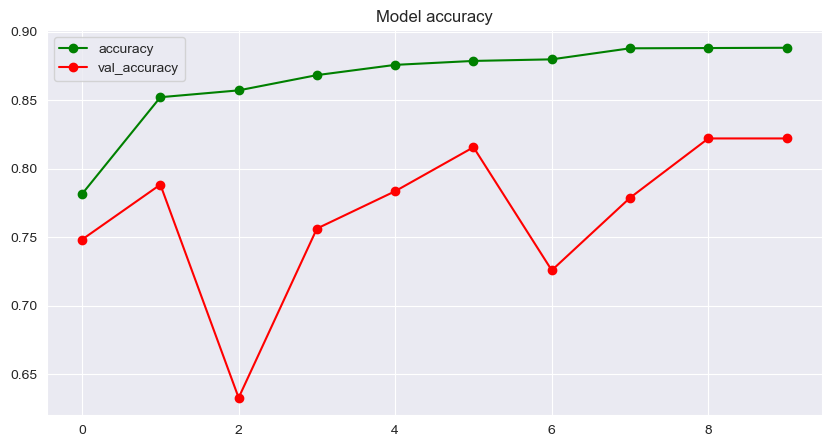

In [46]:
plt.figure(figsize = (10, 5))
plt.title("Model accuracy")
plt.plot(history.history["accuracy"], "go-")
plt.plot(history.history["val_accuracy"], "ro-")
plt.legend(["accuracy", "val_accuracy"])
plt.show()

In [47]:
test_loss, test_accuracy = model.evaluate(test_set, steps = 50)
print("The testing accuracy is: ", test_accuracy * 100, "%")
print("The testing loss is: ", test_loss * 100, "%")

50/50 [==============================] - 10s 201ms/step - loss: 0.3905 - accuracy: 0.8221
The testing accuracy is:  82.21153616905212 %
The testing loss is:  39.04732167720795 %


In [48]:
new_image_path = 'chest_xray/test/PNEUMONIA/person1676_virus_2892.jpeg'
test_image = image.load_img(new_image_path, target_size=(224, 224))
img_array = image.img_to_array(test_image)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalisation des valeurs des pixels

prediction= model.predict(img_array)
plt.imshow(test_image )
if(prediction[0] > 0.5):
        statistic = prediction[0].item() * 100 
        print("This image is %.3f percent %s"% (statistic, "P N E U M O N I A"))
else:
        statistic = (1.0 - prediction[0]).item() * 100
        print("This image is %.3f percent %s" % (statistic, "N O R M A L"))

1/1 [==============================] - 0s 136ms/step
This image is 79.560 percent P N E U M O N I A


In [49]:
test_dir = "chest_xray/test"
test_data, test_labels = [], []

In [50]:
for i in ["/NORMAL/", "/PNEUMONIA/"]:
    for image in (os.listdir(test_dir + i)):
        image = plt.imread(test_dir + i + image)
        image = cv2.resize(image, (224, 224))
        image = np.dstack([image, image, image])
        image = image.astype("float32") / 255
        if i == "/NORMAL/":
            label = 0
        elif i == "/PNEUMONIA/":
            label = 1
        test_data.append(image)
        test_labels.append(label)

test_data = np.array(test_data)
test_labels = np.array(test_labels)

In [51]:
test_data = np.array(test_data)
test_labels = np.array(test_labels)
test_labels.shape

(624,)

_______C o n f u s i o n   m a t r i x_______

20/20 [==============================] - 4s 175ms/step


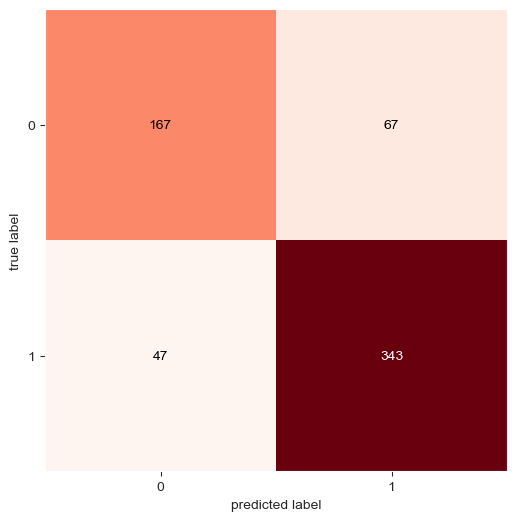

In [52]:
print("_______C o n f u s i o n   m a t r i x_______\n")

predictions = model.predict(test_data)
conf_m = confusion_matrix(test_labels, np.round(predictions))
acc = accuracy_score(test_labels, np.round(predictions)) * 100
tn, fp, fn, tp = conf_m.ravel()

fig, ax = plot_confusion_matrix(conf_mat = conf_m, figsize = (6, 6), cmap = matplotlib.pyplot.cm.Reds)
plt.show()
             

In [53]:
predictions = list()
preds = model.predict(test_data)
for i in preds:
    if i >= 0.5:
        predictions.append(1)
    else:
        predictions.append(0)
   # Calculer le rapport de classification
report = classification_report(test_labels, predictions )

# Afficher le rapport de classification
print(report)  

20/20 [==============================] - 3s 173ms/step
              precision    recall  f1-score   support

           0       0.78      0.71      0.75       234
           1       0.84      0.88      0.86       390

    accuracy                           0.82       624
   macro avg       0.81      0.80      0.80       624
weighted avg       0.82      0.82      0.82       624

